## Import Library

In [10]:

#General Libraries
import numpy as np
import pandas as pd 

# Machine Learning Libraries
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

# Data Visualiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings




## Load Dataset

In [11]:
test = pd.read_csv("./test.csv", index_col="row_id")
train = pd.read_csv("./train.csv", index_col="row_id")

TARGET = 'target'
FEATURES = [col for col in train.columns if col not in [TARGET]]



In [12]:
print(f'Number of observations in TRAIN:{len(train)}')
print(f'Number of observations in TEST:{len(test)}')

Number of observations in TRAIN:200000
Number of observations in TEST:100000


In [13]:
train.target.value_counts()

Bacteroides_fragilis        20139
Streptococcus_pyogenes      20076
Streptococcus_pneumoniae    20074
Campylobacter_jejuni        20063
Salmonella_enterica         20030
Escherichia_coli            19958
Enterococcus_hirae          19947
Escherichia_fergusonii      19937
Staphylococcus_aureus       19929
Klebsiella_pneumoniae       19847
Name: target, dtype: int64

In [14]:
print(train[FEATURES].duplicated().sum())
print(test[FEATURES].duplicated().sum()) #중복값 확인 

76007
26779


In [15]:
train.drop_duplicates(keep='first', inplace=True) #중복값 중 첫번째만 남기기 

In [16]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [17]:
X = train.drop("target", axis=1).astype(np.float32)

from sklearn.preprocessing import LabelEncoder
     

target_encoder = LabelEncoder()
y = pd.Series(target_encoder.fit_transform(train["target"]))

## Train, Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train[FEATURES].values, y, random_state=42)

## Standard Scale

In [19]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

## Linear Discriminant Analysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)
X_train_lda = lda.transform(X_train_std)
X_test_lda = lda.transform(X_test_std)


<AxesSubplot:>

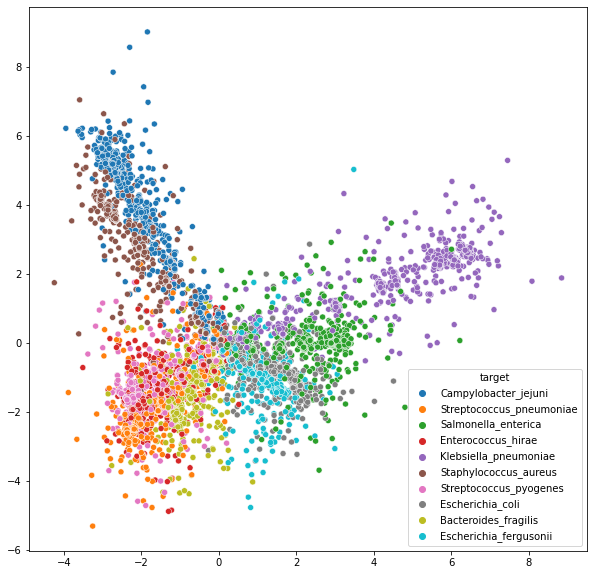

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

train_sub = train.sample(10000, random_state= 42)
lda_data = LDA(n_components=2).fit_transform(train_sub.drop(columns='target'),train_sub.target)
plt.figure(figsize=(10,10))
sns.scatterplot(x = lda_data[:, 0], y = lda_data[:, 1], hue = 'target', data=train_sub)

In [22]:
from sklearn.ensemble import RandomForestClassifier
# learning..
clf_rf_lda = RandomForestClassifier(max_depth=2, random_state=42)
clf_rf_lda.fit(X_train_lda, y_train)

# prediction
pred_rf_lda = clf_rf_lda.predict(X_test_lda)

from sklearn.metrics import accuracy_score
accuracy_lda = accuracy_score(y_test, pred_rf_lda)
print('# Prediction with LDA: ')
print(accuracy_lda)

# Prediction with LDA: 
0.8151230684860802


In [31]:
from sklearn.ensemble import RandomForestClassifier
# learning..
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train_std, y_train)

# prediction
pred_rf = rf.predict(X_test_std)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_rf)
print('# Prediction with Naive ')
print(accuracy)

# Prediction with Naive 
0.7424755637278622


In [29]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) #양성 음성

X_train_pca  = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

print("원 데이터 형태 : {}".format(str(X_train.shape)))
print("PCA 이후 차원 축소된 데이터 형태 : {}".format(str(X_train_pca.shape)))

원 데이터 형태 : (92994, 286)
PCA 이후 차원 축소된 데이터 형태 : (92994, 2)


In [30]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train_pca, y_train)

# prediction
pred_rf_pca = rf.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_rf_pca)
print('# Prediction with pca: ')
print(accuracy)

# Prediction with pca: 
0.4747249911287461
